In [53]:
from spicy import signal, ndimage
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [93]:
base, sr = librosa.load("tiengtho.mp3")
noise1 = base[0:20000] + np.random.normal(0, 0.1, 20000)
noise2 = base[20000:100000] + np.random.normal(0, 0.05, 80000)
noise3 = base[100000:200000] + np.random.normal(0, 0, 100000)
noise4 = base[200000:220000] + np.random.normal(0, 0.2, 20000)
noise5 = base[220000:300000] + np.random.normal(0, 0, 80000)
noise6 = base[300000:328192] + np.random.normal(0, 0.25, 28192)
noise = np.concatenate((noise1, noise2, noise3, noise4, noise5, noise6))

(-1.0, 1.0)

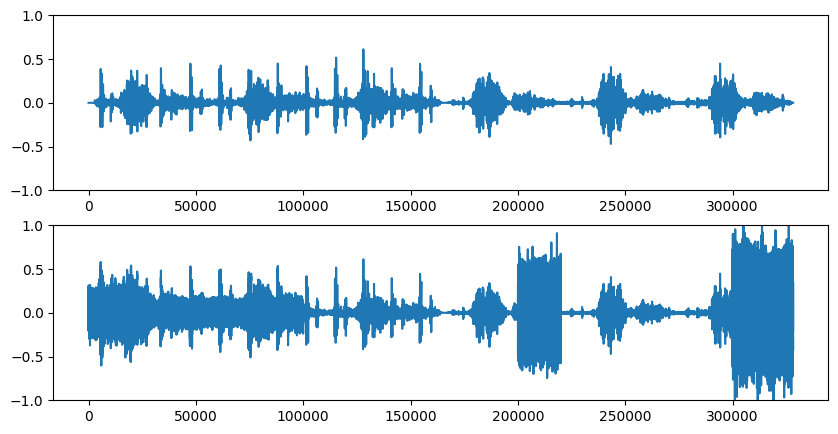

In [94]:
ax, fig = plt.subplots(2, 1, figsize=(10, 5))
fig[0].plot(base)
fig[1].plot(noise)
fig[0].set_ylim([-1,1])
fig[1].set_ylim([-1,1])


## Bộ lọc trung vị:
Tham số truyền vào:kernel_size. giúp giảm các tạp âm có giá trị quá lớn hoặc quá nhỏ, làm mịn tín hiệu 
#### kernel_size: 
kích thước cửa sổ của bộ lọc trung vị (cửa sổ sẽ trượt qua tín hiệu để lấy trung vị). Quá lớn: mất thông tin; Quá nhỏ: không có hiệu quả trong việc lọc nhiễu và làm mịn

(-1.0, 1.0)

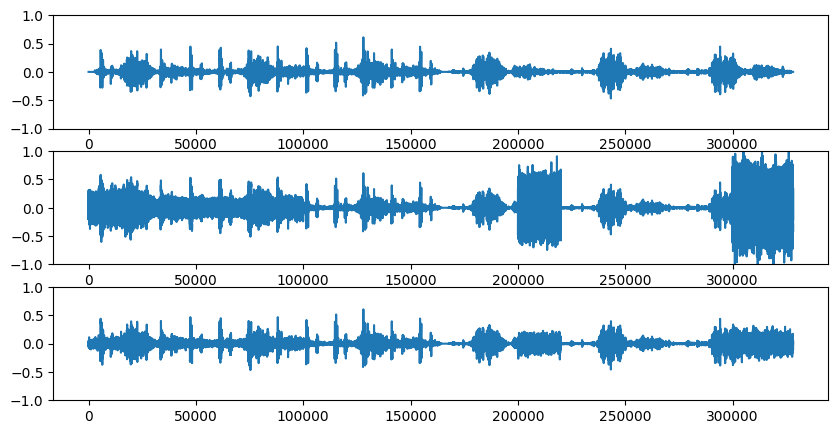

In [118]:
ax, fig = plt.subplots(3, 1, figsize=(10, 5))
fig[0].plot(base)
fig[1].plot(noise)
fig[2].plot(signal.medfilt(noise, kernel_size=15))
fig[0].set_ylim([-1,1])
fig[1].set_ylim([-1,1])
fig[2].set_ylim([-1,1])




## Bộ lọc wiener:
Tham số truyền vào: mysize, noise. giúp giảm các tạp âm có giá trị quá lớn hoặc quá nhỏ, làm mịn tín hiệu 
#### mysize: 
kích thước cửa sổ của bộ lọc trung vị (cửa sổ sẽ trượt qua tín hiệu để lấy trung vị). Quá lớn: mất thông tin; Quá nhỏ: không có hiệu quả trong việc lọc nhiễu và làm mịn
#### noise:
Mức độ của nhiễu đối với tín hiệu. Việc chọn noise quá nhỏ (nhiễu ít ảnh hưởng đến tín hiệu) sẽ làm bộ lọc không lọc được nhiễu hiệu quả. Việc noise quá lớn lại làm mất mát nhiều thông tin.

(-1.0, 1.0)

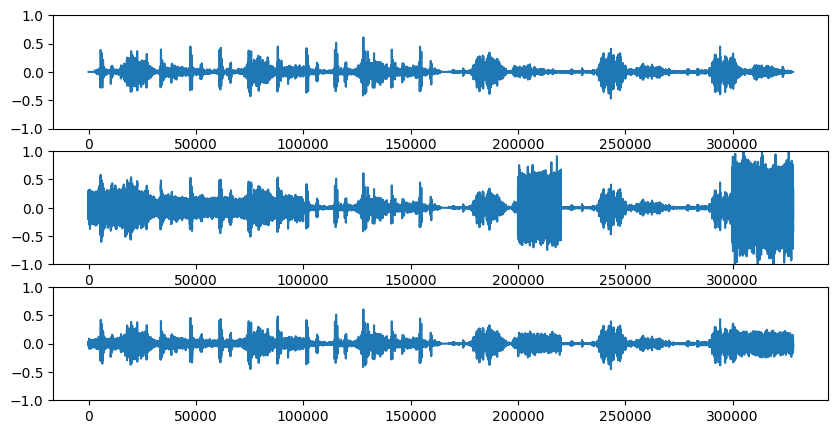

In [131]:
ax, fig = plt.subplots(3, 1, figsize=(10, 5))
fig[0].plot(base)
fig[1].plot(noise)
fig[2].plot(signal.wiener(noise, mysize=15, noise=0.5))
fig[0].set_ylim([-1,1])
fig[1].set_ylim([-1,1])
fig[2].set_ylim([-1,1])

## Bộ lọc Savitzky-Golay (FIR):
Tham số truyền vào: mysize, noise. giúp giảm các tạp âm có giá trị quá lớn hoặc quá nhỏ, làm mịn tín hiệu 
#### window_length: Kích thước cửa sổ trượt
Số điểm dùng tính toán giá trị trung bình trượt. càng lớn thì đường cong càng mịn nhưng làm mất đi chi tiết và độ nhạy của bộ lọc. càng nhỏ thì tăng độ nhạy của bộ lọc, tránh mâts dữ liệu nhưng giảm tác dụng của lọc (tăng nhiễu)  
#### polyorder: Bậc đa thức
Là đa thức để tính giá trị trung bình trượt. Bậc đa thức càng lớn thì bộ lọc càng nhạy với biến động nhưng tăng tính toán. Bậc càng giảm thì nhẹ vèe tính toán nhưng giảm khả năng lọc nhiễu.
### deriv: Bậc của đạo hàm (luôn nhỏ hơn bậc đa thức)
Tính toán đạo hàm của đường cong đã được làm mịn, có chức năng phát hiện và làm nổi bật các biến động; xác định điểm uốn và cực trị, hữu ích trong việc trích xuất dữ liệu (cần lọc, không trích xuất nên để = 0 )
### delta: Bước giữa các diểm dữ liệu
Tăng: giảm độ nhạy của bộ lọc, giảm chi phí tính toán, mất chi tiết, không phù hợp với dữ liệu tần số cao
Giảm: Tăng độ nhạy, giữ chi tiết , tăng chi phí tính toán, phù hợp với dữ liệu tần số cao
### mode: các chế độ xử lý đường biên dữ liệu (điêm đầu-cuối).
Việc lọc sẽ làm tín hiệu bị mất (kích thước cửa sổ trượt) dữ liệu tại điểm đầu và cuối. Để bổ sung dữ liệu có các mode sau:
- mirror: mỏ rộng dữ liệu bằng cách lặp lại giá trị
- constant: giá trị 2 biên không đổi, thêm padding dựa vào tham số cval
- nearest: giá trị các điểm biên được xác đinh bằng các điểm gần nhất 
- wrap: xác định bởi phía đối diện của chuỗi 
- interp(df): không mở rộng, sử dụng một đa thức bậc polyorder phù hợp với giá trị biên 
### cval: int, giá trị để điền vào nếu mode = constant

(-1.0, 1.0)

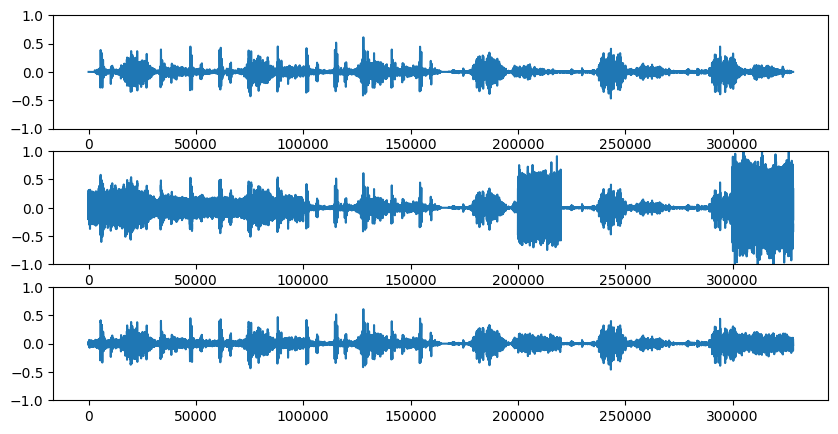

In [163]:
ax, fig = plt.subplots(3, 1, figsize=(10, 5))
fig[0].plot(base)
fig[1].plot(noise)
fig[2].plot(signal.savgol_filter(x = noise, window_length=50, polyorder=2, deriv=0, delta=1.0,  mode='mirror'))
fig[0].set_ylim([-1,1])
fig[1].set_ylim([-1,1])
fig[2].set_ylim([-1,1])


## Bộ lọc Butterworth
- Cho phép chuyển những tần số trong miền passband không có độ chệch nào và cố gắng giảm thiểu độ mạnh tín hiệu ở miền bandstop  
- Ổn định, đơn giản, dễ triển khai, được dùng nhiều trong nhúng và realtime
- Đặc trưng bởi 2 tham số (bậc n và tần số cắt f_c).
    + Bậc n: càng lớn, đáp ứng tần số suy giảm càng dốc ==> độ suy giảm tần số chặn càng nhanh. Nhưng sẽ làm tăng độ phức tạp tính toán
    + tần số cut_off: đáp ứng tần số chuyển qua giảm xuống 3 dB so với mức tối đa trong passband, giới giữa stopband và passband, ảnh hưởng đến độ dốc (càng lớn càng dốc và ngược lại)

(-1.0, 1.0)

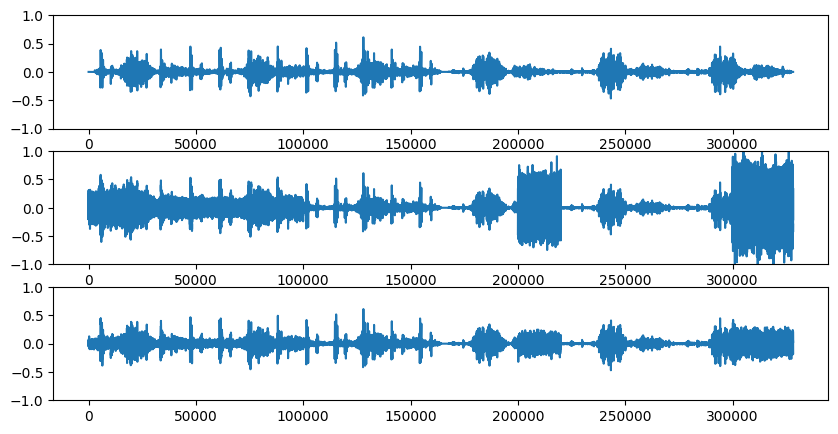

In [175]:
# Thiết lập thông số cho bộ lọc
wp = 0.1  
ws = 0.7  
gpass = 0.1  
gstop = 200  
N, Wn = signal.buttord(wp, ws, gpass, gstop, analog=False, fs=None)
b, a = signal.butter(N, Wn, analog=False, btype='low', output='ba')
# Lọc tín hiệu
ax, fig = plt.subplots(3, 1, figsize=(10, 5))
fig[0].plot(base)
fig[1].plot(noise)
fig[2].plot(signal.lfilter(b, a, noise))
fig[0].set_ylim([-1,1])
fig[1].set_ylim([-1,1])
fig[2].set_ylim([-1,1])